  # E-Commerce Goods Shipment Duration prediction and Estimating Late Delivery Risk

E-commerce goods Late delivery risk identification by predicting fastest and normal Shipping Durations. The model built by us, will enable E-commerce and Goods/products delivery industries to identify the 'risk of late delivery' and predict the fastest and normal duration of goods shipment for their Inland and foreign clients/ customers/buyers.

# GOAL :
* Reduce dimension of the dataset using SOM or PCA or SVD
* Standardize required features
*  Building a Multi-Output Model to determine the maximum range of shipping time, by predicting the Fastest and Normal duration for shipping of goods for both Inland and International customers.
*  Building a Binary Classifier to classify orders with high probabilty of late delivery (Late Delivery Risk analyser).

# Data Source :
* Dataset link : https://data.mendeley.com/datasets/8gx2fvg2k6/5
* Kaggle dataset link : https://www.kaggle.com/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis

This is the dataset of Supply Chains used by the company DataaCo Global which includes a collection of their products sold, finacial details(profit, loss, total sales etc.), Shipping details, and customer details such as sales, demographics, and transaction details. The data spans to 91 MB engulfing details of 180,519 customers spanning to 53 columns related to Clothing , Sports,and Electronic Supplies.

# 1) IMPORTING LIBRARIES AND PACKAGES

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 2) DATASET IMPORTING

In [2]:
data = pd.read_csv('../input/dataco-smart-supply-chain-for-big-data-analysis/DataCoSupplyChainDataset.csv',header= 0,encoding='unicode_escape')
pd.set_option('display.max_columns',None)
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


# 3) Missing Value Identification

In [4]:
def features_with_missing_values(data):
    x = data.isnull().sum().sum()/(data.shape[0]*data.shape[1])*100
    print('Percentage of Total Missing Values is ' ,round(x,2) ,'%')
    print('Missing Value Estimation :')
    for i in data.columns:
        if data[i].isna().sum()>0:
            print('The Feature ',i,' has '+ str(data[i].isna().sum()) + ' missing values')
            
features_with_missing_values(data)

Percentage of Total Missing Values is  3.51 %
Missing Value Estimation :
The Feature  Customer Lname  has 8 missing values
The Feature  Customer Zipcode  has 3 missing values
The Feature  Order Zipcode  has 155679 missing values
The Feature  Product Description  has 180519 missing values


# 4) EXPLORATORY DATA ANALYSIS [EDA]

# Dataset description

In [3]:
def data_info(data):
    print('1) Number of columns are : ',data.shape[1])
    print('2) Number of rows are : ',data.shape[0])
    print('3) Total number of data-points :',data.size)
    numerical_features = [f for f in data.columns if data[f].dtypes!='O']
    print('4) Count of Numerical Features :',len(numerical_features))
    cat_features = [c for c in data.columns if data[c].dtypes=='O']
    print('5) Count of Categorical Features :',len(cat_features))
data_info(data)

1) Number of columns are :  53
2) Number of rows are :  180519
3) Total number of data-points : 9567507
4) Count of Numerical Features : 29
5) Count of Categorical Features : 24


In [36]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()
for col in categorical_cols:
   unique_values = data[col].unique()
   num_unique = len(unique_values)
   print(f"\nColumn: {col}")
   print(f"Number of unique values: {num_unique}")
   print("Unique values:")
   print(unique_values)


Column: Type
Number of unique values: 4
Unique values:
['DEBIT' 'TRANSFER' 'CASH' 'PAYMENT']

Column: Delivery Status
Number of unique values: 4
Unique values:
['Advance shipping' 'Late delivery' 'Shipping on time' 'Shipping canceled']

Column: Category Name
Number of unique values: 50
Unique values:
['Sporting Goods' 'Cleats' 'Shop By Sport' "Women's Apparel" 'Electronics'
 'Boxing & MMA' 'Cardio Equipment' 'Trade-In' "Kids' Golf Clubs"
 'Hunting & Shooting' 'Baseball & Softball' "Men's Footwear"
 'Camping & Hiking' 'Consumer Electronics' 'Cameras ' 'Computers'
 'Basketball' 'Soccer' "Girls' Apparel" 'Accessories' "Women's Clothing"
 'Crafts' "Men's Clothing" 'Tennis & Racquet' 'Fitness Accessories'
 'As Seen on  TV!' 'Golf Balls' 'Strength Training' "Children's Clothing"
 'Lacrosse' 'Baby ' 'Fishing' 'Books ' 'DVDs' 'CDs ' 'Garden' 'Hockey'
 'Pet Supplies' 'Health and Beauty' 'Music' 'Video Games' 'Golf Gloves'
 'Golf Bags & Carts' 'Golf Shoes' 'Golf Apparel' "Women's Golf Clubs"
 "

# Target value analysis

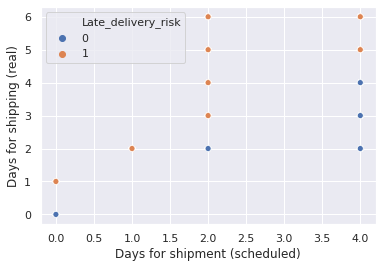

In [5]:
# Target value analysis
sns.set()
sns.scatterplot(x="Days for shipment (scheduled)",y="Days for shipping (real)",hue="Late_delivery_risk",data=data)

# Correlation matrix

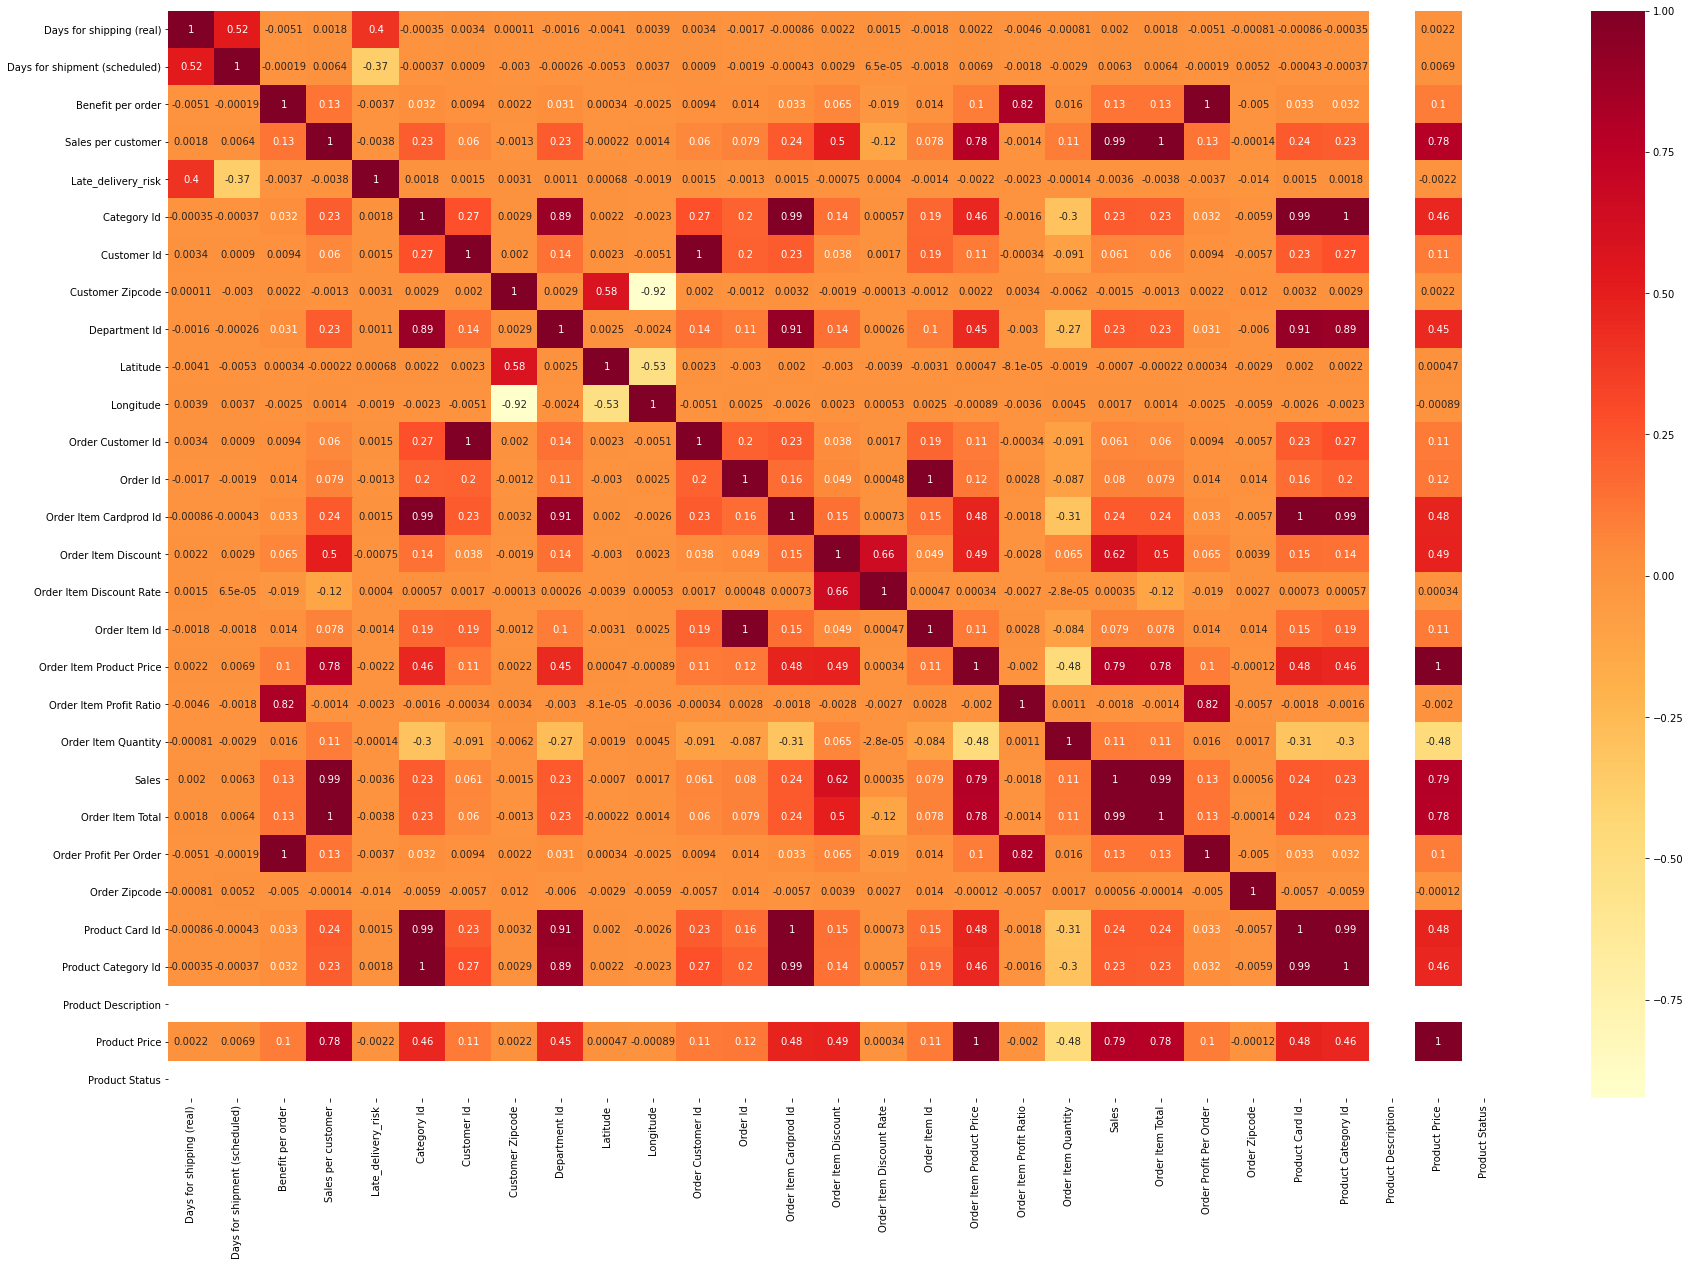

In [32]:
corrmap = data.corr()
top=corrmap.index
plt.figure(figsize=(30,20))
g=sns.heatmap(data[top].corr(),annot=True,cmap="YlOrRd")

## Insights from Heatmap:
**1. Columns that are similar with same values but with different metadata (duplicate columns)**
  * [Benefit per order], Order Profit per order
  * [Sales per customer], Sales, Order Item Total
  * [Category ID], Product Category ID, Order Customer ID, Order Item Category ID, Product card ID,
  * [Order Item Product Price],Product Price
  
**2. Unwanted features(null or less correlated values)**
  * Product Description
  * Product Status

# Min, Max Range, Skewness, Kurtosis, mean, median, mode

<Figure size 1296x576 with 0 Axes>

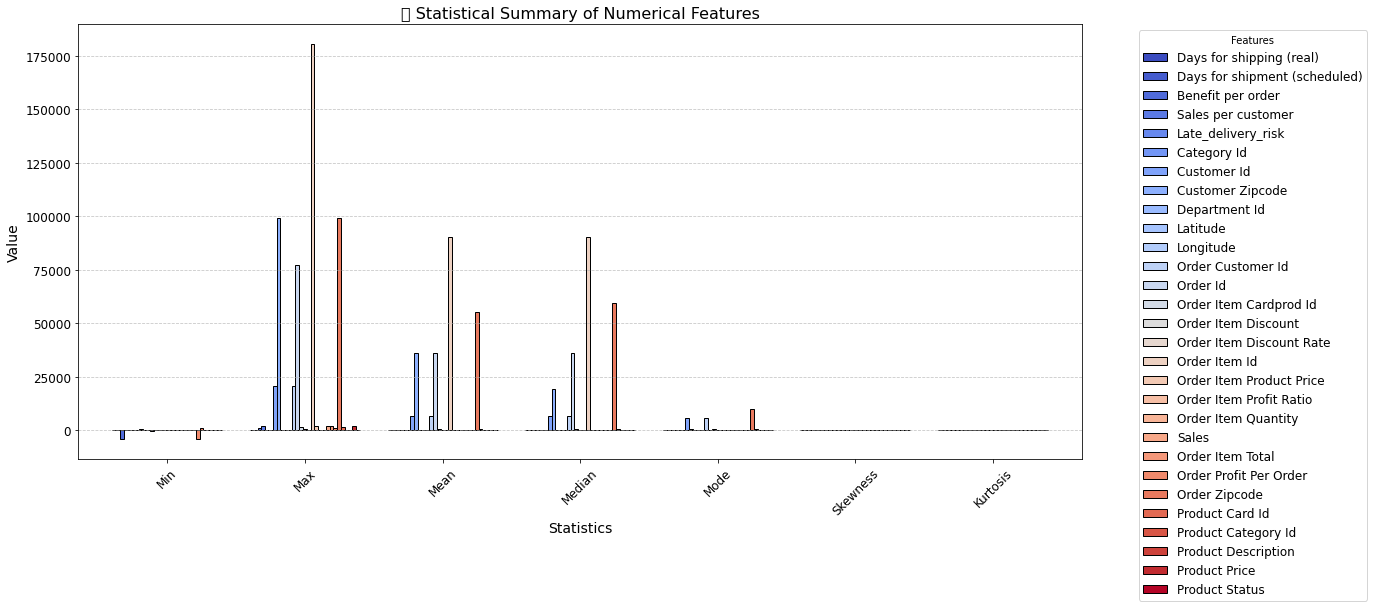

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Ensure numerical columns
numerical_cols = data.select_dtypes(include=[np.number])

# Compute statistics for numerical columns
stats_df = pd.DataFrame({
    'Min': numerical_cols.min(),
    'Max': numerical_cols.max(),
    'Mean': numerical_cols.mean(),
    'Median': numerical_cols.median(),
    'Mode': numerical_cols.apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan),
    'Skewness': numerical_cols.apply(skew),
    'Kurtosis': numerical_cols.apply(kurtosis)
})

# Convert to float for visualization
stats_df = stats_df.astype(float)

# Increase figure size and plot bar chart
plt.figure(figsize=(18, 8))
stats_df.T.plot(kind='bar', figsize=(18, 8), colormap='coolwarm', edgecolor='black', width=0.8)
plt.title("📊 Statistical Summary of Numerical Features", fontsize=16)
plt.xlabel("Statistics", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Features", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


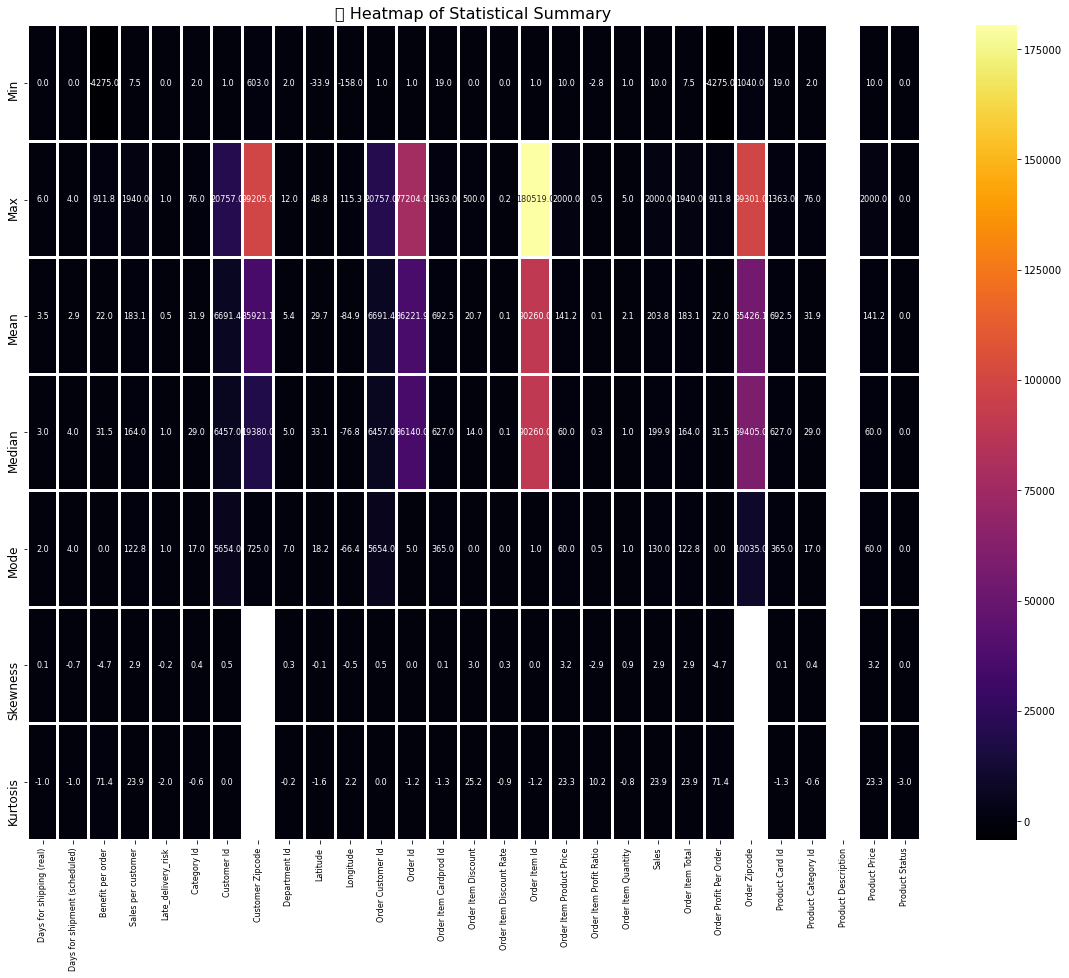

In [31]:
plt.figure(figsize=(20, 15))  # Increased size
sns.heatmap(stats_df.T, annot=True, fmt=".1f", cmap='inferno', linewidths=2, annot_kws={"size": 8})  # Adjust font size
plt.title("📊 Heatmap of Statistical Summary", fontsize=16)
plt.xticks(fontsize=8, rotation=90)
plt.yticks(fontsize=12)
plt.show()

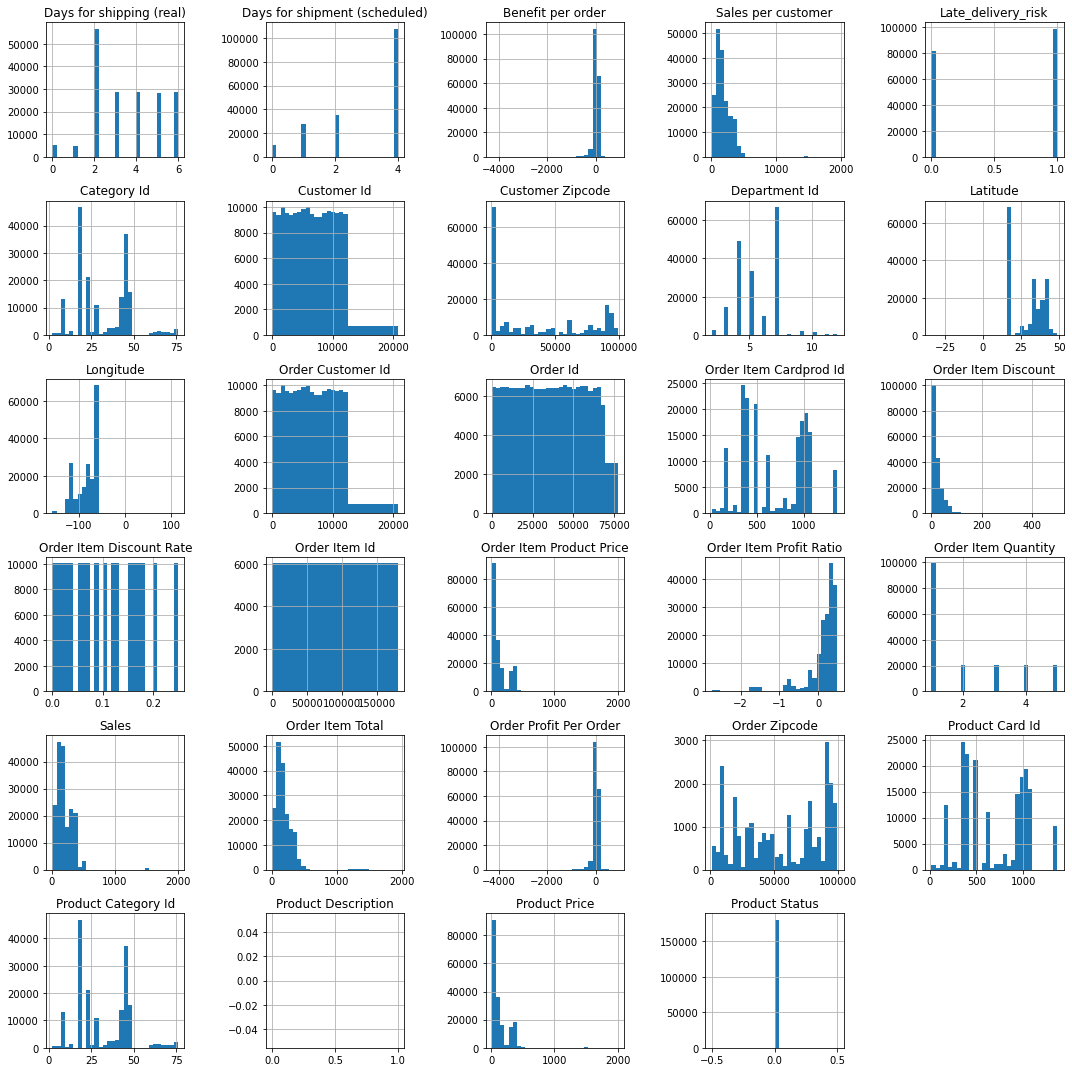

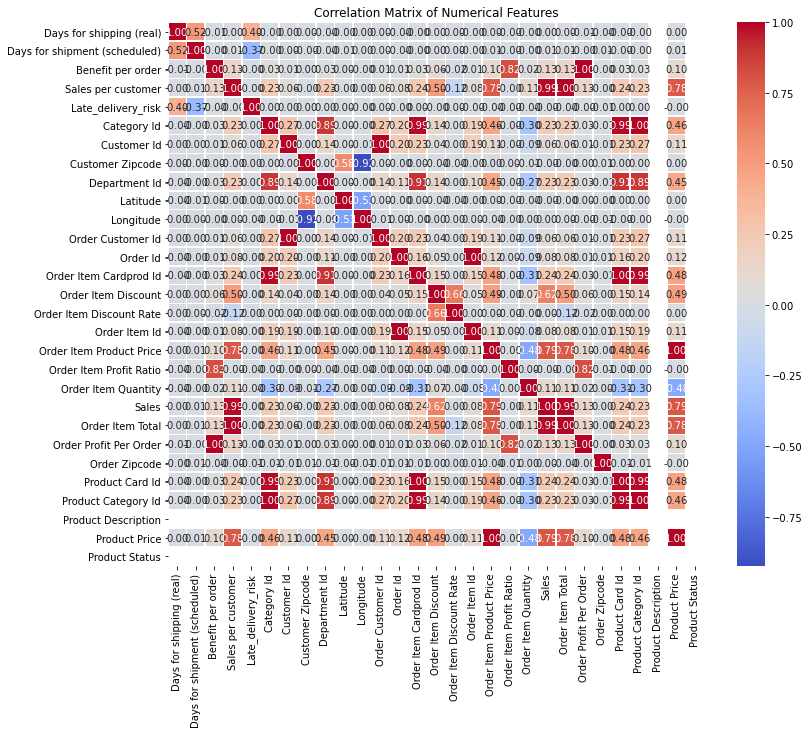

In [3]:
# 3. Distribution of Numerical Features
numerical_cols = data.select_dtypes(include=['number']).columns

# Plot histograms for numerical features
data[numerical_cols].hist(bins=30, figsize=(15, 15))
plt.tight_layout()
plt.show()

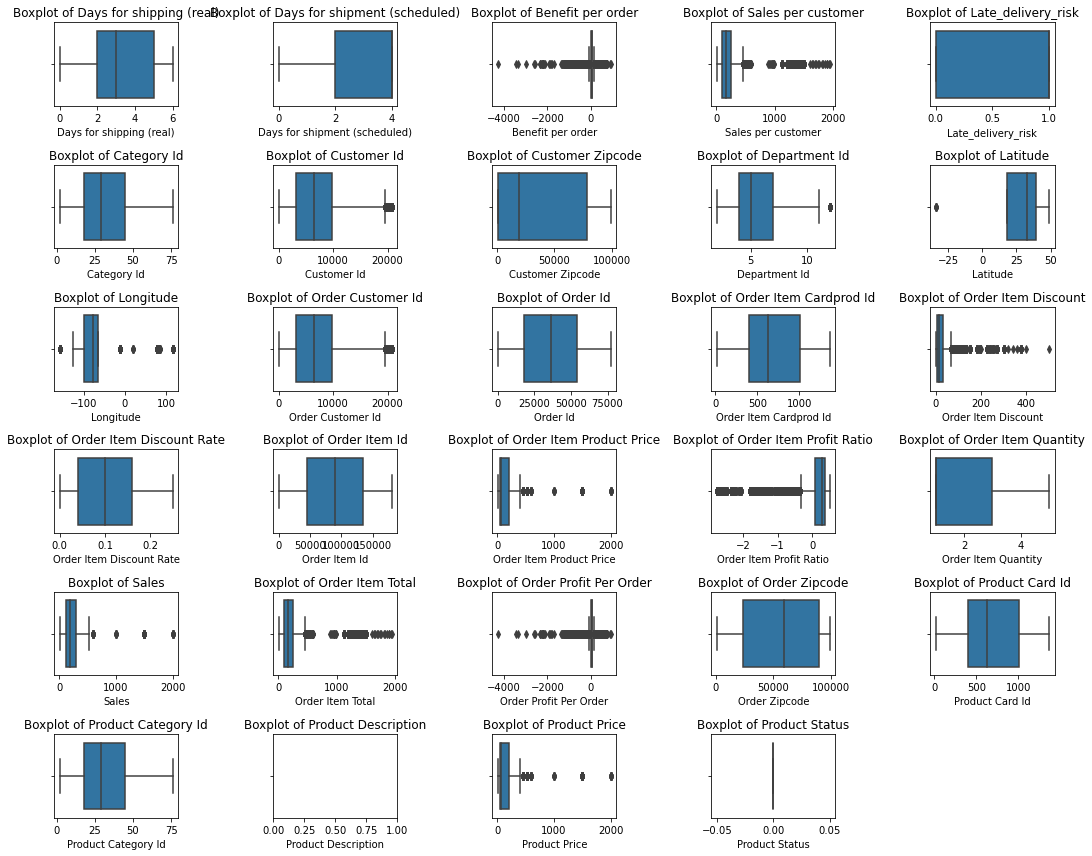

In [4]:
# 5. Boxplots for Numerical Features to Check for Outliers
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(6, 5, i)
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

# 5) FEATURE ENGINEERING

In [3]:
#Converting categorical features that represent date and time to datetime datatype.
data['order_date'] = pd.to_datetime(data['order date (DateOrders)'])
data['shipping_date']=pd.to_datetime(data['shipping date (DateOrders)'])

In [4]:
# Handling Time and date variables
data['order_year'] = pd.DatetimeIndex(data['order_date']).year
data['order_month'] = pd.DatetimeIndex(data['order_date']).month
data['order_day'] = pd.DatetimeIndex(data['order_date']).day
data['shipping_year'] = pd.DatetimeIndex(data['shipping_date']).year
data['shipping_month'] = pd.DatetimeIndex(data['shipping_date']).month
data['shipping_day'] = pd.DatetimeIndex(data['shipping_date']).day

# Removing unwanted features and using 21 relevant features

In [5]:
new_dataset_features = ['Type','Days for shipping (real)','Days for shipment (scheduled)','Late_delivery_risk','Benefit per order',
                        'Sales per customer','Latitude','Longitude','Shipping Mode','Order Status','Order Region',
                        'Order Country','Order City','Market','Delivery Status','order_day','order_month','order_year',
                        'shipping_day','shipping_month','shipping_year']
len(new_dataset_features)

21

In [6]:
new_data = data[new_dataset_features]
model_data = new_data
new_data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Benefit per order,Sales per customer,Latitude,Longitude,Shipping Mode,Order Status,Order Region,Order Country,Order City,Market,Delivery Status,order_day,order_month,order_year,shipping_day,shipping_month,shipping_year
0,DEBIT,3,4,0,91.250000,314.640015,18.251453,-66.037056,Standard Class,COMPLETE,Southeast Asia,Indonesia,Bekasi,Pacific Asia,Advance shipping,31,1,2018,3,2,2018
1,TRANSFER,5,4,1,-249.089996,311.359985,18.279451,-66.037064,Standard Class,PENDING,South Asia,India,Bikaner,Pacific Asia,Late delivery,13,1,2018,18,1,2018
2,CASH,4,4,0,-247.779999,309.720001,37.292233,-121.881279,Standard Class,CLOSED,South Asia,India,Bikaner,Pacific Asia,Shipping on time,13,1,2018,17,1,2018
3,DEBIT,3,4,0,22.860001,304.809998,34.125946,-118.291016,Standard Class,COMPLETE,Oceania,Australia,Townsville,Pacific Asia,Advance shipping,13,1,2018,16,1,2018
4,PAYMENT,2,4,0,134.210007,298.250000,18.253769,-66.037048,Standard Class,PENDING_PAYMENT,Oceania,Australia,Townsville,Pacific Asia,Advance shipping,13,1,2018,15,1,2018


# One-hot encoding

In [7]:
#One-Hot encoding categotical variables in the data
model_data = pd.get_dummies(model_data)
model_data.shape

(180519, 3823)

# Start of dimensionality reduction for Days shipping (real) and Days scheduled prediction

# 6) PCA 

# Dataset for pca for multi-model regression

In [8]:
model_data_mmr = model_data.drop(['Days for shipping (real)','Days for shipment (scheduled)'],axis=1)

Explained variance ratio: [0.00142873 0.0011634  0.00114017 0.00109027 0.00090947 0.00081865
 0.00081237 0.00080702 0.00080066 0.00079803]


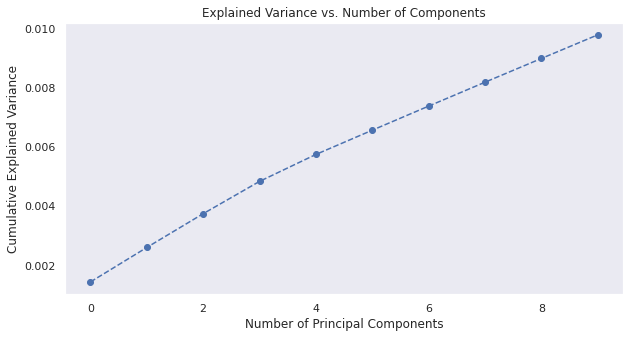

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the dataset before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(model_data_mmr)  # Assuming df is numeric after encoding

# Apply PCA
pca = PCA(n_components=10)  # Choose the number of components
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
# Plot cumulative explained variance
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()

# 7) Truncated SVD

In [15]:
from sklearn.decomposition import TruncatedSVD

# Apply Truncated SVD instead of PCA
svd = TruncatedSVD(n_components=20)  # Adjust components
X_svd = svd.fit_transform(model_data_mmr)

# Check explained variance
print("Explained Variance Ratio:", svd.explained_variance_ratio_.sum())

Explained Variance Ratio: 0.9998951250901348


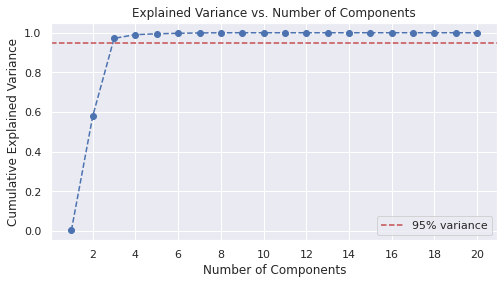

In [16]:
cumulative_variance = np.cumsum(svd.explained_variance_ratio_)
# Plot explained variance
plt.figure(figsize=(8, 4))
plt.plot(range(1, 20 + 1), cumulative_variance, marker='o', linestyle='--', color='b')

# Labels and Title
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')

# Set x-axis to start from 2
plt.xticks(range(2, 20 + 1, 2))  # Step of 2 to keep it clean

# Show threshold line (e.g., 95% variance)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.legend()
plt.show()


In [17]:
from sklearn.model_selection import train_test_split
# Define target variables
target_cols = ["days of shipping (real)", "days of shipment (scheduled)"]

# Apply Truncated SVD (already computed)
n_components = 4  # Use the first 4 components
svd = TruncatedSVD(n_components=n_components)
X_svd = svd.fit_transform(model_data_mmr)
X=X_svd
y = model_data[['Days for shipping (real)','Days for shipment (scheduled)']]

# Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (144415, 4) Test shape: (36104, 4)


**PCA is not performing well on the dataset but truncated svd works , next after splitting train and test we'll perform SOM for dimensionality reduction**

# 8)Train-test split and standardizing

In [9]:
#standardizing model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 


# Standardize the dataset 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(model_data_mmr)
y = model_data[['Days for shipping (real)','Days for shipment (scheduled)']]
# Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)# Assuming df is numeric after encoding


# 9)SOM

In [11]:
import numpy as np

def calculate_som_grid_size(num_samples):
    """
    Calculates the width and length of the SOM grid using the heuristic formula.
    
    Args:
        num_samples (int): Number of samples in the dataset.
        
    Returns:
        tuple: (width, length) of the SOM grid.
    """
    grid_size = int(np.sqrt(num_samples))  # Heuristic rule
    width = round(grid_size)
    length = round(num_samples / width)
    
    return width, length

# Example usage with your dataset
num_samples = 180519  # 2 lakh observations in your dataset
width, length = calculate_som_grid_size(num_samples)

print(f"Optimal SOM Grid Size: {width} × {length}")


Optimal SOM Grid Size: 424 × 426


In [21]:
#som
from minisom import MiniSom
# Define SOM parameters (grid size: 5x5)
som = MiniSom(x=10, y=15, input_len=X_train.shape[1], sigma=1.0, learning_rate=0.5, random_seed=42)

# Train SOM
som.train_random(X_train, num_iteration=100)

# Get SOM reduced features (5x5 grid = 25 neurons, reducing features to 4)
X_train_som = np.array([som.winner(x) for x in X_train])[:, 0:4]
X_test_som = np.array([som.winner(x) for x in X_test])[:, 0:4]

print("SOM Dimensionality Reduction Completed!")
print(f"Original Feature Shape: {X_train.shape} → SOM Reduced Shape: {X_train_som.shape}")

SOM Dimensionality Reduction Completed!
Original Feature Shape: (144415, 3821) → SOM Reduced Shape: (144415, 2)


In [22]:
from sklearn.decomposition import PCA
import numpy as np

# Apply PCA on the SOM-reduced features
pca = PCA(n_components=2)
pca.fit(X_train_som)

explained_variance = np.sum(pca.explained_variance_ratio_) * 100
print(f"🔹 Variance Explained by SOM Components: {explained_variance:.2f}%")


🔹 Variance Explained by SOM Components: 100.00%


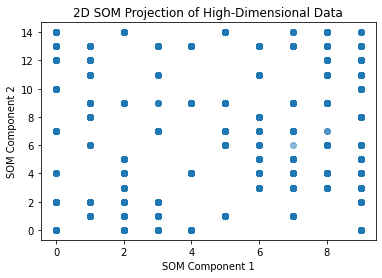

In [23]:
import matplotlib.pyplot as plt

plt.scatter(X_train_som[:, 0], X_train_som[:, 1], alpha=0.5)
plt.xlabel("SOM Component 1")
plt.ylabel("SOM Component 2")
plt.title("2D SOM Projection of High-Dimensional Data")
plt.show()

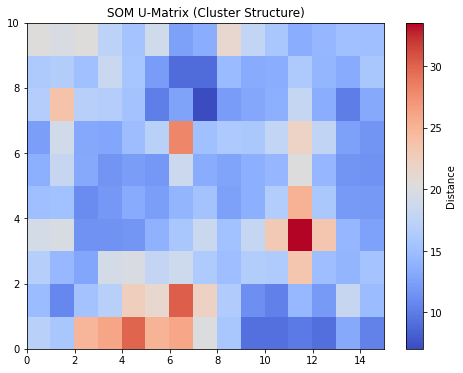

In [14]:
#visualization
from pylab import plot, show, pcolor, colorbar
#u matrix
# Get distance matrix for visualization
u_matrix = np.zeros((10, 15))  # 5x5 SOM grid

for i in range(10):
    for j in range(15):
        neighbors = []
        if i > 0:
            neighbors.append(som._weights[i-1, j])
        if i < 9:
            neighbors.append(som._weights[i+1, j])
        if j > 0:
            neighbors.append(som._weights[i, j-1])
        if j < 14:
            neighbors.append(som._weights[i, j+1])
        
        u_matrix[i, j] = np.mean([np.linalg.norm(som._weights[i, j] - n) for n in neighbors])

# Plot U-Matrix
plt.figure(figsize=(8, 6))
pcolor(u_matrix, cmap="coolwarm")  # Color grid based on distances
colorbar(label="Distance")
plt.title("SOM U-Matrix (Cluster Structure)")
show()

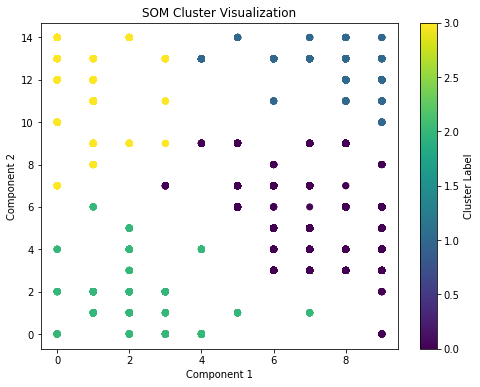

In [15]:
from sklearn.cluster import KMeans

# Use KMeans on SOM output
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_train_som)

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_train_som[:, 0], X_train_som[:, 1], c=labels, cmap="viridis")
plt.colorbar(label="Cluster Label")
plt.title("SOM Cluster Visualization")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

# 10)Prediction


# Multioutput regressor + SOM

In [16]:
#lr
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define Multi-Output Regression Model
multi_regressor = MultiOutputRegressor(LinearRegression())

# Train Model
multi_regressor.fit(X_train_som, y_train)

# Predict on Test Set
y_pred = multi_regressor.predict(X_test_som)

# Evaluate Performance
mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')

print(f"MAE for Days for shipping (real): {mae[0]:.4f}")
print(f"MAE for Days for shipment (scheduled): {mae[1]:.4f}")
print(f"MSE for Days for shipping (real): {mse[0]:.4f}")
print(f"MSE for Days for shipment (scheduled): {mse[1]:.4f}")

MAE for Days for shipping (real): 1.4202
MAE for Days for shipment (scheduled): 1.2610
MSE for Days for shipping (real): 2.6322
MSE for Days for shipment (scheduled): 1.8699


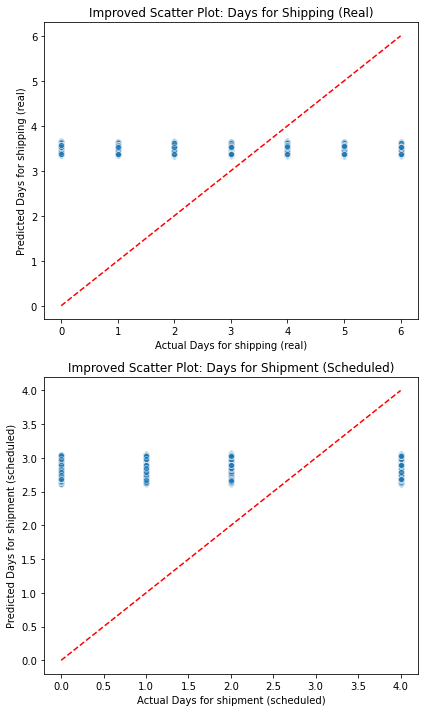

In [17]:
# Convert to NumPy array
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)

fig, axes = plt.subplots(2, 1, figsize=(6, 10))

# 📌 Plot 1: Days for shipping (real)
sns.scatterplot(ax=axes[0], x=y_test_np[:, 0], y=y_pred_np[:, 0], alpha=0.5)
axes[0].plot([min(y_test_np[:, 0]), max(y_test_np[:, 0])], 
             [min(y_test_np[:, 0]), max(y_test_np[:, 0])], 'r--')  # Reference line
axes[0].set_xlabel("Actual Days for shipping (real)")
axes[0].set_ylabel("Predicted Days for shipping (real)")
axes[0].set_title("Improved Scatter Plot: Days for Shipping (Real)")

# 📌 Plot 2: Days for shipment (scheduled)
sns.scatterplot(ax=axes[1], x=y_test_np[:, 1], y=y_pred_np[:, 1], alpha=0.5)
axes[1].plot([min(y_test_np[:, 1]), max(y_test_np[:, 1])], 
             [min(y_test_np[:, 1]), max(y_test_np[:, 1])], 'r--')  # Reference line
axes[1].set_xlabel("Actual Days for shipment (scheduled)")
axes[1].set_ylabel("Predicted Days for shipment (scheduled)")
axes[1].set_title("Improved Scatter Plot: Days for Shipment (Scheduled)")

plt.tight_layout()
plt.show()


# Randomforest+som

MAE: 1.2920
MSE: 2.1842


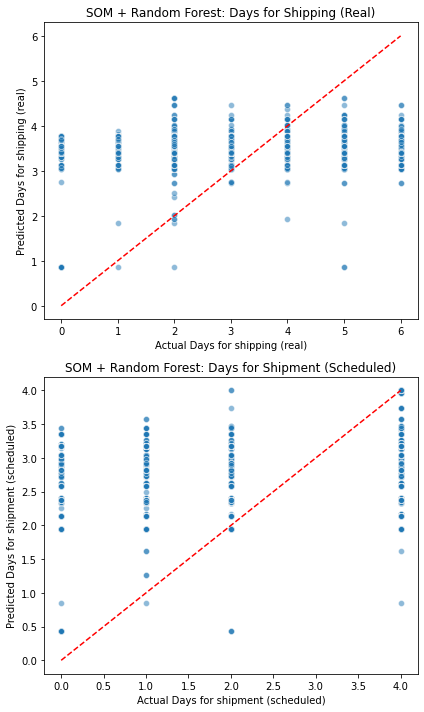

In [18]:
#randomforest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Step 2: Train Multi-Output Random Forest
rf_model = RandomForestRegressor(n_estimators=400, random_state=42)
rf_model.fit(X_train_som, y_train)

# Step 3: Predictions
y_pred = rf_model.predict(X_test_som)

# Step 4: Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")

# Step 5: Visualization - Actual vs Predicted Scatter Plot
fig, axes = plt.subplots(2, 1, figsize=(6, 10))

# Days for shipping (real)
sns.scatterplot(ax=axes[0], x=y_test.iloc[:, 0], y=y_pred[:, 0], alpha=0.5)
axes[0].plot([min(y_test.iloc[:, 0]), max(y_test.iloc[:, 0])], 
             [min(y_test.iloc[:, 0]), max(y_test.iloc[:, 0])], 'r--')
axes[0].set_xlabel("Actual Days for shipping (real)")
axes[0].set_ylabel("Predicted Days for shipping (real)")
axes[0].set_title("SOM + Random Forest: Days for Shipping (Real)")

# Days for shipment (scheduled)
sns.scatterplot(ax=axes[1], x=y_test.iloc[:, 1], y=y_pred[:, 1], alpha=0.5)
axes[1].plot([min(y_test.iloc[:, 1]), max(y_test.iloc[:, 1])], 
             [min(y_test.iloc[:, 1]), max(y_test.iloc[:, 1])], 'r--')
axes[1].set_xlabel("Actual Days for shipment (scheduled)")
axes[1].set_ylabel("Predicted Days for shipment (scheduled)")
axes[1].set_title("SOM + Random Forest: Days for Shipment (Scheduled)")

plt.tight_layout()
plt.show()

# SOM + XGboost

XGBoost MAE: 1.2921
XGBoost MSE: 2.1842


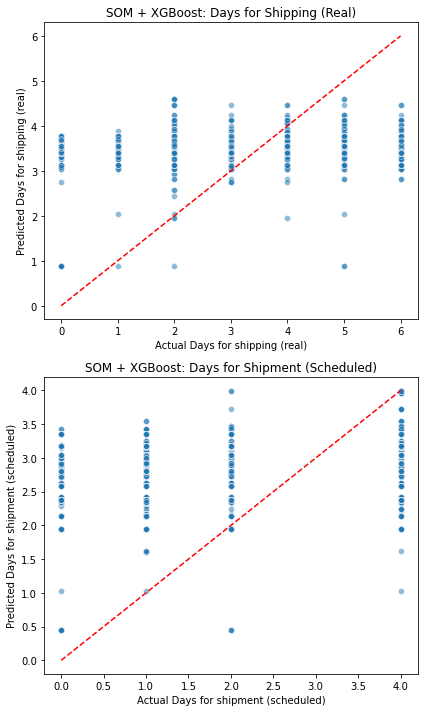

In [19]:
#xgboost
from xgboost import XGBRegressor
# Step 2: Train Multi-Output XGBoost using MultiOutputRegressor
xgb_model = MultiOutputRegressor(XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42))
xgb_model.fit(X_train_som, y_train)

# Step 3: Predictions
y_pred = xgb_model.predict(X_test_som)

# Step 4: Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"XGBoost MAE: {mae:.4f}")
print(f"XGBoost MSE: {mse:.4f}")

# Step 5: Visualization - Actual vs Predicted Scatter Plot
fig, axes = plt.subplots(2, 1, figsize=(6, 10))

# Days for shipping (real)
sns.scatterplot(ax=axes[0], x=y_test.iloc[:, 0], y=y_pred[:, 0], alpha=0.5)
axes[0].plot([min(y_test.iloc[:, 0]), max(y_test.iloc[:, 0])], 
             [min(y_test.iloc[:, 0]), max(y_test.iloc[:, 0])], 'r--')
axes[0].set_xlabel("Actual Days for shipping (real)")
axes[0].set_ylabel("Predicted Days for shipping (real)")
axes[0].set_title("SOM + XGBoost: Days for Shipping (Real)")

# Days for shipment (scheduled)
sns.scatterplot(ax=axes[1], x=y_test.iloc[:, 1], y=y_pred[:, 1], alpha=0.5)
axes[1].plot([min(y_test.iloc[:, 1]), max(y_test.iloc[:, 1])], 
             [min(y_test.iloc[:, 1]), max(y_test.iloc[:, 1])], 'r--')
axes[1].set_xlabel("Actual Days for shipment (scheduled)")
axes[1].set_ylabel("Predicted Days for shipment (scheduled)")
axes[1].set_title("SOM + XGBoost: Days for Shipment (Scheduled)")

plt.tight_layout()
plt.show()

# SOM + ANN

Epoch 1/100
4513/4513 [==============================] - 6s 1ms/step - loss: 0.9789 - mae: 0.8755 - val_loss: 0.9750 - val_mae: 0.8780
Epoch 2/100
4513/4513 [==============================] - 6s 1ms/step - loss: 0.9715 - mae: 0.8711 - val_loss: 0.9722 - val_mae: 0.8698
Epoch 3/100
4513/4513 [==============================] - 6s 1ms/step - loss: 0.9701 - mae: 0.8698 - val_loss: 0.9684 - val_mae: 0.8670
Epoch 4/100
4513/4513 [==============================] - 6s 1ms/step - loss: 0.9689 - mae: 0.8689 - val_loss: 0.9675 - val_mae: 0.8725
Epoch 5/100
4513/4513 [==============================] - 6s 1ms/step - loss: 0.9679 - mae: 0.8680 - val_loss: 0.9666 - val_mae: 0.8690
Epoch 6/100
4513/4513 [==============================] - 6s 1ms/step - loss: 0.9673 - mae: 0.8674 - val_loss: 0.9666 - val_mae: 0.8682
Epoch 7/100
4513/4513 [==============================] - 6s 1ms/step - loss: 0.9669 - mae: 0.8669 - val_loss: 0.9652 - val_mae: 0.8682
Epoch 8/100
4513/4513 [==============================] 

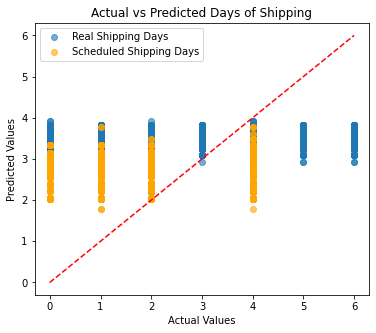

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
# Define the Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_som.shape[1],)),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(16, activation='relu'),  # Hidden layer
    Dense(2, activation='linear')  # Output layer (2 outputs: Days for shipping real & scheduled)
])
# Standardize the target variables (y_train & y_test)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_som, y_train_scaled, epochs=100, batch_size=32, validation_data=(X_test_som, y_test_scaled), verbose=1)

# Predict the values
y_pred_scaled = model.predict(X_test_som)
y_pred = scaler_y.inverse_transform(y_pred_scaled)  # Convert back to original scale

# Evaluate model performance
mse, mae = model.evaluate(X_test_som, y_test_scaled, verbose=0)
print(f"\n✅ Model Performance:\nMean Absolute Error (MAE): {mae:.4f}\nMean Squared Error (MSE): {mse:.4f}")

# Visualize Actual vs. Predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.scatter(y_test.iloc[:, 0], y_pred[:, 0], alpha=0.6, label='Real Shipping Days')
plt.scatter(y_test.iloc[:, 1], y_pred[:, 1], alpha=0.6, label='Scheduled Shipping Days', color='orange')
plt.plot([min(y_test.min()), max(y_test.max())], [min(y_test.min()), max(y_test.max())], 'r--')  # Perfect Prediction Line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.title("Actual vs Predicted Days of Shipping")
plt.show()

# SOM + decision tree

Decision Tree Performance (Using SOM-Reduced Features):
Mean Absolute Error (MAE): 1.2920
Mean Squared Error (MSE): 2.1842


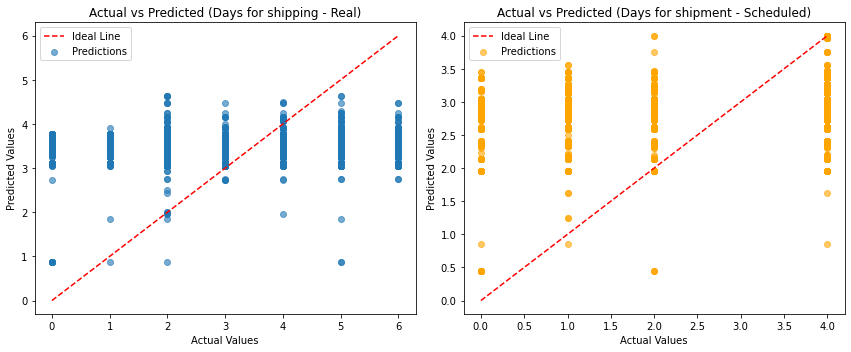

In [27]:
from sklearn.tree import DecisionTreeRegressor
# Initialize Decision Tree Regressor for Multi-Output Regression
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model on SOM-reduced features
dt_regressor.fit(X_train_som, y_train)

# Make predictions
y_pred_dt = dt_regressor.predict(X_test_som)

# Evaluate Performance
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

print(f"Decision Tree Performance (Using SOM-Reduced Features):")
print(f"Mean Absolute Error (MAE): {mae_dt:.4f}")
print(f"Mean Squared Error (MSE): {mse_dt:.4f}")


# Scatter plot for Actual vs Predicted values
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for 'Days for shipping (real)'
axes[0].scatter(y_test.iloc[:, 0], y_pred_dt[:, 0], alpha=0.6, label='Predictions')
axes[0].plot([min(y_test.iloc[:, 0]), max(y_test.iloc[:, 0])], 
             [min(y_test.iloc[:, 0]), max(y_test.iloc[:, 0])], 'r--', label='Ideal Line')
axes[0].set_title("Actual vs Predicted (Days for shipping - Real)")
axes[0].set_xlabel("Actual Values")
axes[0].set_ylabel("Predicted Values")
axes[0].legend()

# Plot for 'Days for shipment (scheduled)'
axes[1].scatter(y_test.iloc[:, 1], y_pred_dt[:, 1], alpha=0.6, label='Predictions', color='orange')
axes[1].plot([min(y_test.iloc[:, 1]), max(y_test.iloc[:, 1])], 
             [min(y_test.iloc[:, 1]), max(y_test.iloc[:, 1])], 'r--', label='Ideal Line')
axes[1].set_title("Actual vs Predicted (Days for shipment - Scheduled)")
axes[1].set_xlabel("Actual Values")
axes[1].set_ylabel("Predicted Values")
axes[1].legend()

plt.tight_layout()
plt.show()

# 11) PREDICTIVE ANALYTICS : Late_delivery_prediction

# Data Preprocessing

In [10]:
pip install minisom

  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11709 sha256=7f92414573b6e04a4e6c24e478d28d7ec4a24d8bcc97c265bce899e8965770e7
  Stored in directory: /root/.cache/pip/wheels/43/13/d9/36acead33a8aed82503f967973ae8930ddaacd9c93612d0ee8
Successfully built minisom
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
model_data_ldr = model_data.drop(['Late_delivery_risk'],axis=1)
# Standardize the dataset 
scaler = StandardScaler()
X_scaled_ldr = scaler.fit_transform(model_data_ldr)
y_ldr = model_data[['Late_delivery_risk']]
# Split into training & testing sets
X_train_ldr, X_test_ldr, y_train_ldr, y_test_ldr = train_test_split(X_scaled_ldr, y_ldr, test_size=0.2, random_state=42)# Assuming df is numeric after encoding
# Ensure y_train and y_test are binary (0 or 1)

# SOM Late delivery risk prediction

In [9]:
from minisom import MiniSom
# Define SOM parameters (grid size)
som = MiniSom(x=10, y=15, input_len=X_train_ldr.shape[1], sigma=1.0, learning_rate=0.5, random_seed=42)

# Train SOM
som.train_random(X_train_ldr, num_iteration=100)

# Get SOM reduced features (5x5 grid = 25 neurons, reducing features to 4)
X_train_som_ldr = np.array([som.winner(x) for x in X_train_ldr])[:, 0:4]
X_test_som_ldr = np.array([som.winner(x) for x in X_test_ldr])[:, 0:4]

print("SOM Dimensionality Reduction Completed!")


SOM Dimensionality Reduction Completed!


In [15]:
print(f"Original Feature Shape: {X_train_ldr.shape} → SOM Reduced Shape: {X_train_som_ldr.shape}")

Original Feature Shape: (144415, 3822) → SOM Reduced Shape: (144415, 2)


# SOm + ANN - late delivery prediction

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report
# Define the Neural Network Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_som_ldr.shape[1],)),
    Dropout(0.3),
    Dense(8, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train_som_ldr, y_train_ldr, validation_data=(X_test_som_ldr, y_test_ldr),
                    epochs=20, batch_size=32, verbose=1)

Epoch 1/20
4513/4513 [==============================] - 6s 1ms/step - loss: 0.7014 - accuracy: 0.5376 - val_loss: 0.6826 - val_accuracy: 0.5651
Epoch 2/20
4513/4513 [==============================] - 6s 1ms/step - loss: 0.6834 - accuracy: 0.5589 - val_loss: 0.6809 - val_accuracy: 0.5698
Epoch 3/20
4513/4513 [==============================] - 6s 1ms/step - loss: 0.6827 - accuracy: 0.5646 - val_loss: 0.6829 - val_accuracy: 0.5671
Epoch 4/20
4513/4513 [==============================] - 6s 1ms/step - loss: 0.6823 - accuracy: 0.5657 - val_loss: 0.6810 - val_accuracy: 0.5671
Epoch 5/20
4513/4513 [==============================] - 6s 1ms/step - loss: 0.6817 - accuracy: 0.5675 - val_loss: 0.6827 - val_accuracy: 0.5671
Epoch 6/20
4513/4513 [==============================] - 6s 1ms/step - loss: 0.6807 - accuracy: 0.5663 - val_loss: 0.6808 - val_accuracy: 0.5679
Epoch 7/20
4513/4513 [==============================] - 6s 1ms/step - loss: 0.6804 - accuracy: 0.5665 - val_loss: 0.6793 - val_accuracy:

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc, mean_absolute_error, mean_squared_error
# Predict probabilities
y_pred_proba = model.predict(X_test_som_ldr)

# Convert probabilities to binary predictions (0 or 1)
y_pred_ldr = (y_pred_proba > 0.5).astype(int)

# Compute MAE and MSE (for reference)
mae = mean_absolute_error(y_test_ldr, y_pred_ldr)
mse = mean_squared_error(y_test_ldr, y_pred_ldr)

print("🔹 Accuracy:", round(accuracy_score(y_test_ldr, y_pred_ldr), 4))
print("🔹 Classification Report:\n", classification_report(y_test_ldr, y_pred_ldr))

🔹 Accuracy: 0.5651
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.13      0.22     16307
           1       0.56      0.92      0.70     19797

    accuracy                           0.57     36104
   macro avg       0.57      0.53      0.46     36104
weighted avg       0.57      0.57      0.48     36104



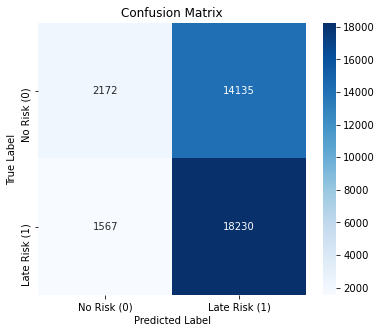

In [21]:
# Plot Confusion Matrix
cm = confusion_matrix(y_test_ldr, y_pred_ldr)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Risk (0)", "Late Risk (1)"], yticklabels=["No Risk (0)", "Late Risk (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


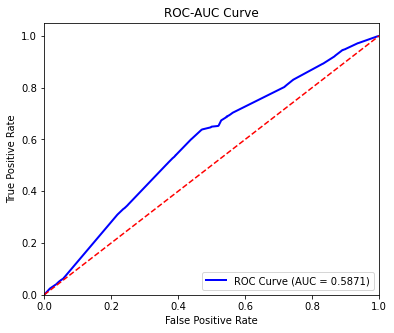

In [23]:
# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test_ldr, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc="lower right")
plt.show()

# SOM + decision tree

In [ ]:
#data pre processing
y_train_ldr = np.where(y_train_ldr > 0.5, 1, 0)  # Convert to 0 or 1
y_test_ldr = np.where(y_test_ldr > 0.5, 1, 0)    # Convert to 0 or 1

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize Decision Tree Regressor for Multi-Output Regression
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model on SOM-reduced features
dt_regressor.fit(X_train_som_ldr, y_train_ldr)

# Make predictions
y_pred_dt_ldr = dt_regressor.predict(X_test_som_ldr)
y_pred_dt_ldr = np.where(y_pred_dt_ldr > 0.5, 1, 0)

# Evaluate Performance
mae_dt = mean_absolute_error(y_test_ldr, y_pred_dt_ldr)
mse_dt = mean_squared_error(y_test_ldr, y_pred_dt_ldr)

print(f"Decision Tree Performance (Using SOM-Reduced Features):")
print(f"Mean Absolute Error (MAE): {mae_dt:.4f}")
print(f"Mean Squared Error (MSE): {mse_dt:.4f}")

Decision Tree Performance (Using SOM-Reduced Features):
Mean Absolute Error (MAE): 0.4708
Mean Squared Error (MSE): 0.2359
[0.65352064 0.65352064 0.59790439 ... 0.65352064 0.46684497 0.75343137]


In [36]:
# Print Classification Report
print("🔹 Decision Tree Performance:")
print("🔹 Classification Report:\n", classification_report(y_test_ldr, y_pred_dt_ldr))

🔹 Decision Tree Performance:
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.45      0.50     16307
           1       0.62      0.74      0.67     19797

    accuracy                           0.60     36104
   macro avg       0.60      0.59      0.59     36104
weighted avg       0.60      0.60      0.60     36104



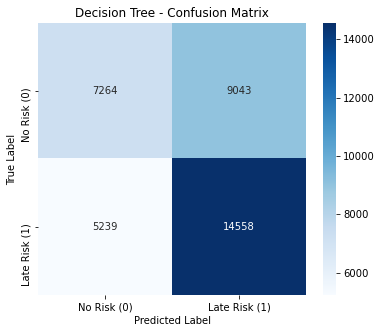

In [38]:
# Confusion Matrix
cm_dt = confusion_matrix(y_test_ldr, y_pred_dt_ldr)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=["No Risk (0)", "Late Risk (1)"], yticklabels=["No Risk (0)", "Late Risk (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Decision Tree - Confusion Matrix")
plt.show()


# SOM + Naive Bayes

🔹 Naïve Bayes Performance:
🔹 Accuracy: 0.5698
🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.27      0.36     16307
           1       0.58      0.82      0.68     19797

    accuracy                           0.57     36104
   macro avg       0.56      0.54      0.52     36104
weighted avg       0.56      0.57      0.53     36104



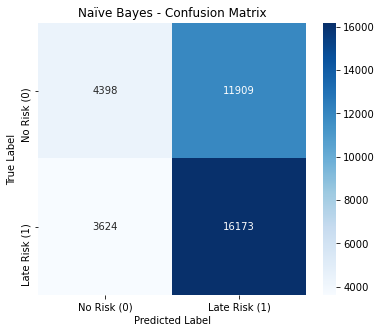

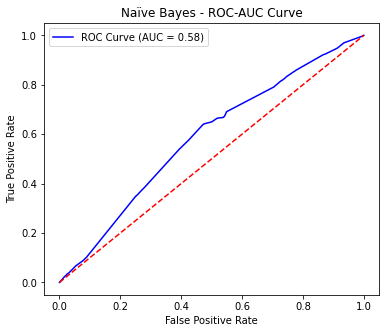

In [40]:
from sklearn.naive_bayes import GaussianNB
# Ensure binary labels for training and testing
y_train_nb = np.where(y_train_ldr > 0.5, 1, 0)
y_test_nb = np.where(y_test_ldr > 0.5, 1, 0)

# Initialize and train Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_som_ldr, y_train_nb)

# Predict on test data
y_pred_nb = nb_model.predict(X_test_som_ldr)
y_prob_nb = nb_model.predict_proba(X_test_som_ldr)[:, 1]# Get probabilities for ROC-AUC
y_pred_nb = np.where(y_pred_nb > 0.5, 1, 0)
# Compute Accuracy
accuracy_nb = accuracy_score(y_test_nb, y_pred_nb)

# Print Classification Report
print("🔹 Naïve Bayes Performance:")
print("🔹 Accuracy:", round(accuracy_nb, 4))
print("🔹 Classification Report:\n", classification_report(y_test_nb, y_pred_nb))

# Confusion Matrix
cm_nb = confusion_matrix(y_test_nb, y_pred_nb)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", xticklabels=["No Risk (0)", "Late Risk (1)"], yticklabels=["No Risk (0)", "Late Risk (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Naïve Bayes - Confusion Matrix")
plt.show()

# Plot ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test_nb, y_prob_nb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="red")  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Naïve Bayes - ROC-AUC Curve")
plt.legend()
plt.show()